# Machine Learning Modeling to detect IoT Attacks using CICIoT2023

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
DATASET_FOLDER = 'C:/Users/Pc/Desktop/Masters Project/Dataset_CICIOT_2023/'

### Importing Dataset

In [3]:
df_CICIoT2023_sets = [k for k in os.listdir(DATASET_FOLDER) if k.endswith('.csv')]
df_CICIoT2023_sets.sort()
CICIoT2023_training_sets = df_CICIoT2023_sets[:int(len(df_CICIoT2023_sets)*.8)]
CICIoT2023_test_sets = df_CICIoT2023_sets[int(len(df_CICIoT2023_sets)*.8):]

In [4]:
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight', 
]
y_column = 'label'

### Scaling

In [5]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [6]:
for train_set in tqdm(CICIoT2023_training_sets):
    scaler.fit(pd.read_csv(DATASET_FOLDER + train_set)[X_columns])

100%|██████████| 135/135 [04:57<00:00,  2.20s/it]


## Categorisation: 2 (1+1) Classes

In [7]:
dict_2category = {}
dict_2category['BenignTraffic'] = 'Benign'

dict_2category['DDoS-RSTFINFlood'] = 'Attack'
dict_2category['DDoS-PSHACK_Flood'] = 'Attack'
dict_2category['DDoS-SYN_Flood'] = 'Attack'
dict_2category['DDoS-UDP_Flood'] = 'Attack'
dict_2category['DDoS-TCP_Flood'] = 'Attack'
dict_2category['DDoS-ICMP_Flood'] = 'Attack'
dict_2category['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2category['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2category['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2category['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2category['DDoS-SlowLoris'] = 'Attack'
dict_2category['DDoS-HTTP_Flood'] = 'Attack'

dict_2category['DoS-UDP_Flood'] = 'Attack'
dict_2category['DoS-SYN_Flood'] = 'Attack'
dict_2category['DoS-TCP_Flood'] = 'Attack'
dict_2category['DoS-HTTP_Flood'] = 'Attack'

dict_2category['Mirai-greeth_flood'] = 'Attack'
dict_2category['Mirai-greip_flood'] = 'Attack'
dict_2category['Mirai-udpplain'] = 'Attack'

dict_2category['Recon-PingSweep'] = 'Attack'
dict_2category['Recon-OSScan'] = 'Attack'
dict_2category['Recon-PortScan'] = 'Attack'
dict_2category['VulnerabilityScan'] = 'Attack'
dict_2category['Recon-HostDiscovery'] = 'Attack'

dict_2category['DNS_Spoofing'] = 'Attack'
dict_2category['MITM-ArpSpoofing'] = 'Attack'

dict_2category['BrowserHijacking'] = 'Attack'
dict_2category['Backdoor_Malware'] = 'Attack'
dict_2category['XSS'] = 'Attack'
dict_2category['Uploading_Attack'] = 'Attack'
dict_2category['SqlInjection'] = 'Attack'
dict_2category['CommandInjection'] = 'Attack'

dict_2category['DictionaryBruteForce'] = 'Attack'

In [8]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

#LogisticRegression(n_jobs=-1),Perceptron(n_jobs=-1),DecisionTreeClassifier(),RandomForestClassifier(n_jobs=-1),ExtraTreesClassifier(n_jobs=-1),AdaBoostClassifier(),BaggingClassifier(n_jobs=-1),GradientBoostingClassifier(),
#"LogisticRegression","Perceptron","DecisionTreeClassifier","RandomForestClassifier","ExtraTreesClassifier","AdaBoostClassifier","BaggingClassifier","GradientBoostingClassifier",

LogisticRegressionCat2Model=LogisticRegression(n_jobs=-1)
PerceptronCat2Model=Perceptron(n_jobs=-1)
DecisionTreeClassifierCat2Model=DecisionTreeClassifier()
RandomForestClassifierCat2Model=RandomForestClassifier(n_jobs=-1)
ExtraTreesClassifierCat2Model=ExtraTreesClassifier(n_jobs=-1)
AdaBoostClassifierCat2Model=AdaBoostClassifier()
BaggingClassifierCat2Model=BaggingClassifier(n_jobs=-1)
GradientBoostingClassifierCat2Model=GradientBoostingClassifier()


ML_models = [
        ExtraTreesClassifierCat2Model,AdaBoostClassifierCat2Model,
]

ML_names = [
        "ExtraTreesClassifierCat2Model","AdaBoostClassifierCat2Model",
]


for train_set in tqdm(CICIoT2023_training_sets):
    #Load File after File
    #print(DATASET_FOLDER + train_set)
    CICIoT2023df = pd.read_csv(DATASET_FOLDER + train_set)
    
    #Data cleanup
    #drop Rate column 'Rate' 'Srate' are same in the dataset. so dropping 'Rate'
    CICIoT2023df.drop(columns=['Rate'])

    #Removal of null values
    CICIoT2023df=CICIoT2023df.dropna()

    #Data scaling standard scalar
    CICIoT2023df[X_columns] = scaler.transform(CICIoT2023df[X_columns])

    #Column renaming to 2Category Attack or Benign(normal traffic)
    new_y = [dict_2category[k] for k in CICIoT2023df[y_column]]
    CICIoT2023df[y_column] = new_y
    
    for model in (ML_models):
        model.fit(CICIoT2023df[X_columns], CICIoT2023df[y_column])
    del CICIoT2023df

for model in (ML_models):
     #To save the model
     filename = f"{type(model).__name__}Cat2Model.sav"  # Using the model's class name as filename
     #print(filename)
     with open(filename, 'wb') as file:
         pickle.dump(model, file)

100%|██████████| 135/135 [2:19:48<00:00, 62.14s/it] 


In [9]:
""" # save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result) """

" # save the model to disk\nfilename = 'finalized_model.sav'\npickle.dump(model, open(filename, 'wb'))\n \n# some time later...\n \n# load the model from disk\nloaded_model = pickle.load(open(filename, 'rb'))\nresult = loaded_model.score(X_test, Y_test)\nprint(result) "

In [10]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(CICIoT2023_test_sets):
    #Load File after File
    CICIoT2023df_test = pd.read_csv(DATASET_FOLDER + test_set)
    #Data cleanup
    #drop Rate column 'Rate' 'Srate' are same in the dataset. so dropping 'Rate'
    CICIoT2023df_test.drop(columns=['Rate'])

    #Removal of null values
    CICIoT2023df_test=CICIoT2023df_test.dropna()

    #Data scaling standard scalar
    CICIoT2023df_test[X_columns] = scaler.transform(CICIoT2023df_test[X_columns])

    #Column renaming to 2Category Attack or Benign(normal traffic)    
    new_y = [dict_2category[k] for k in CICIoT2023df_test[y_column]]
    CICIoT2023df_test[y_column] = new_y
    
    y_test += list(CICIoT2023df_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(CICIoT2023df_test[X_columns]))
        preds[i] = preds[i] + y_pred

100%|██████████| 34/34 [04:42<00:00,  8.30s/it]


##### ExtraTreesClassifierCat2Model (2 classes) #####
accuracy__score:  0.9961952236527072
recall_score:  0.9496400879243644
precision_score:  0.9698582727777033
f1_score:  0.9595148688615407

Predicted    Attack  Benign       All
Actual                               
Attack     10071556   25283  10096839
Benign        14059  229263    243322
All        10085615  254546  10340161

ConfusionMatrixDisplay


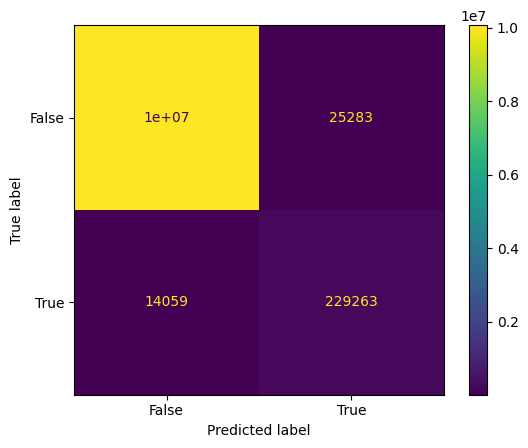



##### AdaBoostClassifierCat2Model (2 classes) #####
accuracy__score:  0.9958986131840694
recall_score:  0.94730312012077
precision_score:  0.9656314821702499
f1_score:  0.9562733447486607

Predicted    Attack  Benign       All
Actual                               
Attack     10070521   26318  10096839
Benign        16091  227231    243322
All        10086612  253549  10340161

ConfusionMatrixDisplay


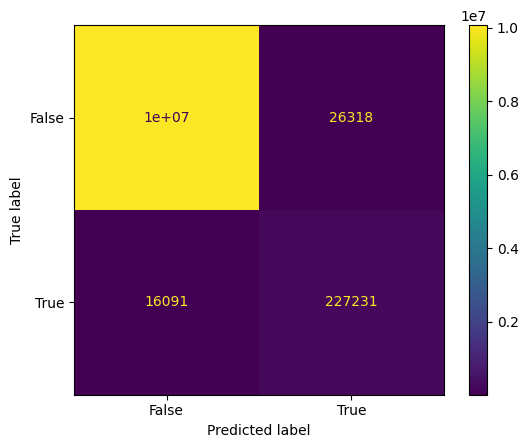

In [11]:
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (2 classes) #####")
    print('accuracy__score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True,dropna=False))
    print()
    print('ConfusionMatrixDisplay')
    #confusion_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
    cm_display.plot()
    plt.show()
    print()
    print()

## Categorisation: 8 (7+1) classes

In [12]:
dict_7category = {}
dict_7category['BenignTraffic'] = 'Benign'

dict_7category['DDoS-RSTFINFlood'] = 'DDoS'
dict_7category['DDoS-PSHACK_Flood'] = 'DDoS'
dict_7category['DDoS-SYN_Flood'] = 'DDoS'
dict_7category['DDoS-UDP_Flood'] = 'DDoS'
dict_7category['DDoS-TCP_Flood'] = 'DDoS'
dict_7category['DDoS-ICMP_Flood'] = 'DDoS'
dict_7category['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_7category['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_7category['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_7category['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_7category['DDoS-SlowLoris'] = 'DDoS'
dict_7category['DDoS-HTTP_Flood'] = 'DDoS'

dict_7category['DoS-UDP_Flood'] = 'DoS'
dict_7category['DoS-SYN_Flood'] = 'DoS'
dict_7category['DoS-TCP_Flood'] = 'DoS'
dict_7category['DoS-HTTP_Flood'] = 'DoS'

dict_7category['Mirai-greeth_flood'] = 'Mirai'
dict_7category['Mirai-greip_flood'] = 'Mirai'
dict_7category['Mirai-udpplain'] = 'Mirai'

dict_7category['Recon-PingSweep'] = 'Recon'
dict_7category['Recon-OSScan'] = 'Recon'
dict_7category['Recon-PortScan'] = 'Recon'
dict_7category['VulnerabilityScan'] = 'Recon'
dict_7category['Recon-HostDiscovery'] = 'Recon'

dict_7category['DNS_Spoofing'] = 'Spoofing'
dict_7category['MITM-ArpSpoofing'] = 'Spoofing'

dict_7category['BrowserHijacking'] = 'Web'
dict_7category['Backdoor_Malware'] = 'Web'
dict_7category['XSS'] = 'Web'
dict_7category['Uploading_Attack'] = 'Web'
dict_7category['SqlInjection'] = 'Web'
dict_7category['CommandInjection'] = 'Web'

dict_7category['DictionaryBruteForce'] = 'BruteForce'

In [13]:
#LogisticRegression(n_jobs=-1),Perceptron(n_jobs=-1),DecisionTreeClassifier(),RandomForestClassifier(n_jobs=-1),ExtraTreesClassifier(n_jobs=-1),AdaBoostClassifier(),BaggingClassifier(n_jobs=-1),GradientBoostingClassifier(),
#"LogisticRegression","Perceptron","DecisionTreeClassifier","RandomForestClassifier","ExtraTreesClassifier","AdaBoostClassifier","BaggingClassifier","GradientBoostingClassifier",

LogisticRegressionCat7Model=LogisticRegression(n_jobs=-1)
PerceptronCat7Model=Perceptron(n_jobs=-1)
DecisionTreeClassifierCat7Model=DecisionTreeClassifier()
RandomForestClassifierCat7Model=RandomForestClassifier(n_jobs=-1)
ExtraTreesClassifierCat7Model=ExtraTreesClassifier(n_jobs=-1)
AdaBoostClassifierCat7Model=AdaBoostClassifier()
BaggingClassifierCat7Model=BaggingClassifier(n_jobs=-1)
GradientBoostingClassifierCat7Model=GradientBoostingClassifier()

ML_models = [
        ExtraTreesClassifierCat2Model,AdaBoostClassifierCat2Model,
]

ML_names = [
        "ExtraTreesClassifierCat2Model","AdaBoostClassifierCat2Model",
]


for train_set in tqdm(CICIoT2023_training_sets):
    #Load File after File
    CICIoT2023df = pd.read_csv(DATASET_FOLDER + train_set)

    #Data cleanup
    #drop Rate column 'Rate' 'Srate' are same in the dataset. so dropping 'Rate'
    CICIoT2023df.drop(columns=['Rate'])
    
    #Removal of null values
    CICIoT2023df=CICIoT2023df.dropna()

    #Data scaling standard scalar
    CICIoT2023df[X_columns] = scaler.transform(CICIoT2023df[X_columns])

    #Column renaming to 7Category Attack or Benign(normal traffic)
    new_y = [dict_7category[k] for k in CICIoT2023df[y_column]]
    CICIoT2023df[y_column] = new_y
    
    for model in (ML_models):
        model.fit(CICIoT2023df[X_columns], CICIoT2023df[y_column])
    del CICIoT2023df

for model in (ML_models):
     #To save the model
     filename = f"{type(model).__name__}Cat7Model.sav"  # Using the model's class name as filename
     #print(filename)
     with open(filename, 'wb') as file:
         pickle.dump(model, file)

100%|██████████| 135/135 [3:27:42<00:00, 92.31s/it]   


In [14]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(CICIoT2023_test_sets):
    #Load File after File
    CICIoT2023df_test = pd.read_csv(DATASET_FOLDER + test_set)
    #Data cleanup
    #drop Rate column 'Rate' 'Srate' are same in the dataset. so dropping 'Rate'
    CICIoT2023df_test.drop(columns=['Rate'])

    #Removal of null values
    CICIoT2023df_test=CICIoT2023df_test.dropna()

    #Data scaling standard scalar
    CICIoT2023df_test[X_columns] = scaler.transform(CICIoT2023df_test[X_columns])

    #Column renaming to 7Category Attack or Benign(normal traffic)    
    new_y = [dict_7category[k] for k in CICIoT2023df_test[y_column]]
    CICIoT2023df_test[y_column] = new_y
    
    y_test += list(CICIoT2023df_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(CICIoT2023df_test[X_columns]))
        preds[i] = preds[i] + y_pred

100%|██████████| 34/34 [08:28<00:00, 14.97s/it]


In [15]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (8 classes) #####")
    print('accuracy_score = ', accuracy_score(y_test, y_pred))
    print('recall_score = ', recall_score(y_test, y_pred, average='macro'))
    print('precision_score = ', precision_score(y_test, y_pred, average='macro'))
    print('f1_score = ', f1_score(y_test, y_pred, average='macro'))
    print()
    print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True,dropna=False))
    print()
    print()
    print()
    print()
    #ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    #plt.show()
    #confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    #cm_display.plot()
    #plt.show()  

##### ExtraTreesClassifierCat2Model (8 classes) #####
accuracy_score =  0.9923886098098472
recall_score =  0.7296024679553397
precision_score =  0.9208987299137277
f1_score =  0.767418544724441

Predicted   Benign  BruteForce     DDoS      DoS   Mirai  Recon  Spoofing  \
Actual                                                                      
Benign      236405           8       12        1       0   1950      4902   
BruteForce    1359         367        0        0       0    346       908   
DDoS            59           0  7520016     5558     198    290        29   
DoS              2           0     9084  1782750     110    206        13   
Mirai            3           0     1427      140  582036     60        11   
Recon        17181          15     1457       96      11  54720      5050   
Spoofing     20662          13       15        9       7   3327     83647   
Web           1871           0        0        1       0    746      1298   
All         277542         403  753

## Categorisation: 34 (33+1) classes

In [16]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

#LogisticRegression(n_jobs=-1),Perceptron(n_jobs=-1),DecisionTreeClassifier(),RandomForestClassifier(n_jobs=-1),ExtraTreesClassifier(n_jobs=-1),AdaBoostClassifier(),BaggingClassifier(n_jobs=-1),GradientBoostingClassifier(),
#"LogisticRegression","Perceptron","DecisionTreeClassifier","RandomForestClassifier","ExtraTreesClassifier","AdaBoostClassifier","BaggingClassifier","GradientBoostingClassifier",

LogisticRegressionCat33Model=LogisticRegression(n_jobs=-1)
PerceptronCat33Model=Perceptron(n_jobs=-1)
DecisionTreeClassifierCat33Model=DecisionTreeClassifier()
RandomForestClassifierCat33Model=RandomForestClassifier(n_jobs=-1)
ExtraTreesClassifierCat33Model=ExtraTreesClassifier(n_jobs=-1)
AdaBoostClassifierCat33Model=AdaBoostClassifier()
BaggingClassifierCat33Model=BaggingClassifier(n_jobs=-1)
GradientBoostingClassifierCat33Model=GradientBoostingClassifier()

ML_models = [
        ExtraTreesClassifierCat2Model,AdaBoostClassifierCat2Model,
]

ML_names = [
        "ExtraTreesClassifierCat2Model","AdaBoostClassifierCat2Model",
]


for train_set in tqdm(CICIoT2023_training_sets):
    #Load File after File
    CICIoT2023df = pd.read_csv(DATASET_FOLDER + train_set)
    
    #Data cleanup
    #drop Rate column 'Rate' 'Srate' are same in the dataset. so dropping 'Rate'
    CICIoT2023df.drop(columns=['Rate'])

    #Removal of null values
    CICIoT2023df=CICIoT2023df.dropna()

    #Data scaling standard scalar
    CICIoT2023df[X_columns] = scaler.transform(CICIoT2023df[X_columns])

    #Column renaming to 2Category Attack or Benign(normal traffic)
    #new_y = [dict_2category[k] for k in CICIoT2023df[y_column]]
    #CICIoT2023df[y_column] = new_y
    
    for model in (ML_models):
        model.fit(CICIoT2023df[X_columns], CICIoT2023df[y_column])
    del CICIoT2023df

for model in (ML_models):
     #To save the model
     filename = f"{type(model).__name__}Cat33Model.sav"  # Using the model's class name as filename
     #print(filename)
     with open(filename, 'wb') as file:
         pickle.dump(model, file)

100%|██████████| 135/135 [5:14:35<00:00, 139.82s/it]  


In [17]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(CICIoT2023_test_sets):
    #Load File after File
    CICIoT2023df_test = pd.read_csv(DATASET_FOLDER + test_set)
    #Data cleanup
    #drop Rate column 'Rate' 'Srate' are same in the dataset. so dropping 'Rate'
    CICIoT2023df_test.drop(columns=['Rate'])

    #Removal of null values
    CICIoT2023df_test=CICIoT2023df_test.dropna()

    #Data scaling standard scalar
    CICIoT2023df_test[X_columns] = scaler.transform(CICIoT2023df_test[X_columns])

    #Column renaming to 34Category Attack or Benign(normal traffic)    
    #new_y = [dict_7category[k] for k in CICIoT2023df_test[y_column]]
    #CICIoT2023df_test[y_column] = new_y
    
    y_test += list(CICIoT2023df_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(CICIoT2023df_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

100%|██████████| 34/34 [15:56<00:00, 28.15s/it]


In [18]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (34 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    #print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True,dropna=False))
    print()
    print()

##### ExtraTreesClassifierCat2Model (34 classes) #####
accuracy_score:  0.9885468901306276
recall_score:  0.7903352304869999
precision_score:  0.6991520545734576
f1_score:  0.7145807195081564



##### AdaBoostClassifierCat2Model (34 classes) #####
accuracy_score:  0.9159431850239083
recall_score:  0.5821954911886522
precision_score:  0.5200061971971253
f1_score:  0.4932532482053136



